In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.stats import qmc
from scipy.stats import norm

BB für MBS selber

In [ ]:
number_paths = 30
months = 360                   #Anzahl der simulierten Monate
sigma = np.sqrt(0.0004)
k = 10
M = 2**k                    #numer of simulated points excluding the first one
delta_t = months/M                     #delta_t : Differenz der Punkte in absoluter Angabe
h = M                       #h : Differenz der Punkte in Indexpunkten
X = np.empty((number_paths,M+1))       #+1 damit die 0 am Anfang mit dabei ist
X[:,0] = 0
X[:,M] = sigma * np.sqrt(M * delta_t) * np.random.randn(number_paths)
for i in range(k):
    h = int(h/2)
    pos = h
    for j in range(2**i):
        X[:,pos] = (1/2) * X[:,pos - h] + (1/2) * X[:,pos + h] + sigma * np.sqrt((1/2) * h * delta_t) * np.random.randn(number_paths)
        #print(pos)
        pos = pos + 2*h
time = np.linspace(0,months,M+1)
plt.plot(time, X.T)
plt.show()
X

In [3]:
def get_BB_power2(n):
    k = 0
    while n%2**k == 0:
        k=k+1
    return (k-1)

set parameters

In [27]:
number_paths = 2              
sigma = np.sqrt(0.0004)
M = 360          #Anzahl der simulierten Monate
g = get_BB_power2(M)                   #numer of simulated points excluding the first one
delta_t = 1 #muss glaube ich 1 sein, weil sonst stimmt die Varianz nicht 

BB Konstruktion für M = 360

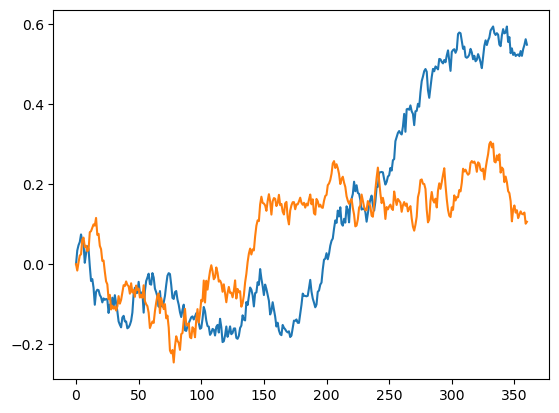

array([[ 0.        ,  0.03436042,  0.04751835,  0.05558876,  0.07452556,
         0.05773376,  0.05016227,  0.0036057 ,  0.02648366,  0.04513143,
         0.03783364, -0.00474539, -0.04192613, -0.03713906, -0.05889254,
        -0.10138794, -0.06920818, -0.0638035 , -0.06495246, -0.07703377,
        -0.08256773, -0.09545933, -0.08552513, -0.08906986, -0.08684407,
        -0.0881862 , -0.12184764, -0.1006371 , -0.10888794, -0.08370778,
        -0.10879932, -0.07741838, -0.09772365, -0.11775442, -0.14308556,
        -0.15135042, -0.15782557, -0.1333825 , -0.12905716, -0.14304479,
        -0.14319179, -0.16023083, -0.15784377, -0.15161232, -0.14159797,
        -0.12086133, -0.07477559, -0.05866376, -0.07225642, -0.07149251,
        -0.04402347, -0.07134574, -0.07224403, -0.06980015, -0.12106186,
        -0.06697504, -0.04208152, -0.03331742, -0.02366045, -0.04949148,
        -0.05108308, -0.02216564, -0.03312121, -0.06105014, -0.07001953,
        -0.08118049, -0.10625302, -0.06716637, -0.1

In [57]:
h = M                       #h : Differenz der Punkte in Indexpunkten   Sit das h hier das a aus dem paper?
X = np.empty((number_paths,M+1))       #+1 damit die 0 am Anfang mit dabei ist
X[:] = np.nan
X[:,0] = 0
X[:,M] = sigma * np.sqrt(M * delta_t) * np.random.randn(number_paths)
for i in range(g):
    h = int(h/2)
    pos = h
    for j in range(2**i):
        X[:,pos] = (1/2) * X[:,pos - h] + (1/2) * X[:,pos + h] + sigma * np.sqrt((1/2) * h * delta_t) * np.random.randn(number_paths)
        #print(pos)
        pos = pos + 2*h
#display(X)
#jetzt die restlichen Werte ausfüllen
#wir betrachten nur die erste Zeile, weil in den weiteren Pfaden an den gleichen Stellen die Werte fehlen


def get_indices_to_calculate():
    to_calculate = np.argwhere(np.isnan(X[0,:]) == True)
    return to_calculate

def get_indices_is_calculated():
    is_calculated = np.argwhere(np.isnan(X[0,:]) == False)
    return is_calculated

i = np.where(np.isnan(X[0,:]) == False)[0][0] #Startwert ist erster Eintrag, der nicht nan ist
while np.isnan(X).any():
    to_calculate = get_indices_to_calculate()
    j = 0
    while to_calculate[j] <= i:
        j +=1

    i = to_calculate[j][0]


    #nun suchen wir den k Index, also den oberen Wert für die Berechnung
    o = 0
    is_calculated = get_indices_is_calculated()
    while is_calculated[o] <= i:    #Achtung neues i, nicht das von unten!
        o+=1
    k = is_calculated[o][0]

    j = is_calculated[o-1][0]

    X[:,i] = ((k-i)/(k-j)) * X[:,j] + ((i-j)/(k-j)) * X[:,k] + sigma * np.sqrt(((k-i)/(k-j)) * delta_t) * np.random.randn(number_paths)
time = np.linspace(0,M,M+1)
plt.plot(time, X.T)
plt.show()
X

In [55]:
np.random.randn(number_paths)


array([-0.35085947, -0.34821748])

In [56]:
X = np.empty((2,3))
display(len(X[0,:]))
X[:]=np.nan
display(X)
display(np.array(np.where(np.isnan(X[0,:])==True)))
display(type(np.where(np.isnan(X)==True)))

3

array([[nan, nan, nan],
       [nan, nan, nan]])

array([[0, 1, 2]], dtype=int64)

tuple

ab hier komplette MBS standard MC Simulation

i_K und w_k für MBS erstellen

In [ ]:
#create normal distributed vector
def random_normal_vector(d,mu, sigma):
    normal_vector = np.random.normal(loc=mu, scale=sigma, size=d)
    return  normal_vector


sigma = np.sqrt(0.0004)
months = 360
number_paths = 100

delta_t = 1 #month
w = np.empty((number_paths,months))

for m in range(number_paths):
    #create lower trinangular matrix with ones
    lower_tri_matr = np.tril(np.ones([months,months]))
    A = math.sqrt(delta_t)*lower_tri_matr
    #create Brownian motion
    w[m,:] = A.dot(random_normal_vector(months,0,sigma))
    
#create differences of the Wiener process
delta_w = np.concatenate((w[:,0].reshape(number_paths,1),np.diff(w, axis=1)),axis=1)


K_0 = math.exp(-(sigma**2)/2)

#X_diff = np.diff(X,axis = 1)    für BB MC Simulation
i_k = np.empty((number_paths,months+1))     #+1 weil i_0 mit drin ist
i_k[:,0] = 0.007
for n in range(number_paths):
    for j in range(months):
        j = j+1
        i_k[n,j] = i_k[n,j-1]*K_0*math.exp(delta_w[n,j-1])
plt.plot(i_k.T)
plt.show()

K1 = 0.01
K2 = -0.005
K3 = 10
K4 = 0.5

w_k = np.empty((number_paths,months))
w_k = K1+K2*np.arctan(K3 * i_k + K4)


MBS MC Simulation

In [ ]:
c = 100 #monthly payment (beliebig?)

u_k = np.empty((number_paths,months))
for k in range(months):
    u_k[:,k] = np.prod(1/(i_k[:,0:k+1] + 1), axis = 1)

c_k = np.ones((number_paths,months))
for k in range(months):                 
    for j in range(months - (k+1)):
        j = j + 1                   #damit man nicht bei 0 anfängt, erster Summand ist schon 1
        c_k[:,k] = c_k[:,k] + (1 + i_k[:,0])**(-j)

r_k = np.empty((number_paths, months))
for k in range(months):
    r_k[:,k] = np.prod(1-w_k[:,0:k+1] , axis = 1)

m_k = np.empty((number_paths, months))
for k in range(months):
    m_k[:,k] = c*r_k[:,k]*((1-w_k[:,k]) + w_k[:,k]*c_k[:,k])


plt.plot(u_k.T)
plt.title("u_k")
plt.show()


plt.plot(c_k.T)
plt.title("c_k")
plt.show




expectation = np.sum(np.sum(u_k * m_k,axis=1))/number_paths
print(expectation)

In [ ]:
#plt.plot(m_k.T)
#plt.title("m_k")
#plt.show

plt.plot(r_k[5,:].T,'x')
plt.title("r_k")
plt.show